## Pisa Data 2012 by Mina Tzana

## Investigation Overview

This is an analysis for the PISA 2012 dataset for data analyst nanodegree of Udacity.
<br> In this analysis we are going to explore the cleaned dataset and present the findings in a slideshow.
<br>In this analysis we will use the following features of the dataset:

* Country
* Gender
* late_for_sch
* possessions_room
* possessions_literature
* math_imprtnt_future_student
* math_imprtnt_future_parents
* possessions_computer
* class_size
* teach_diff_task_to_diff_stud
* teach_gives_feedback
* stud_belong_at_sch
* stud_give_up_easy
* math_score
* reading_score
* science_score
* ave_score
* possessions_litterature

We will explore the dataset based on different factors and then present our plotted findings.

## Dataset Overview
The PISA database contains the full set of responses from individual students, school principals and parents. 
PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.


Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In this dataset we have 485490 students and 18 selected rows.
<br>The original dataset had 640 columns.
<br>We chose the ones that we were interested in and create a new dataset.
<br>Most of the columns have categorical variables.

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [13]:
#Load the dataset that we created in previous notebook.
df_clean = pd.read_csv('df_clean.csv')

## Which country have the most assessed students?
As we can see in the chart, Mexico is by far the country with the most assessed students. Italy is the second one with 31073 students, Spain is the 3rd with 25313 students. Canada and Brazil are following with 21544 and 19204 students respectively.
* We see the results in a barchart starting from the country with the most assessments.
* We can also see the results in a pie chart with the country assessment percentages.

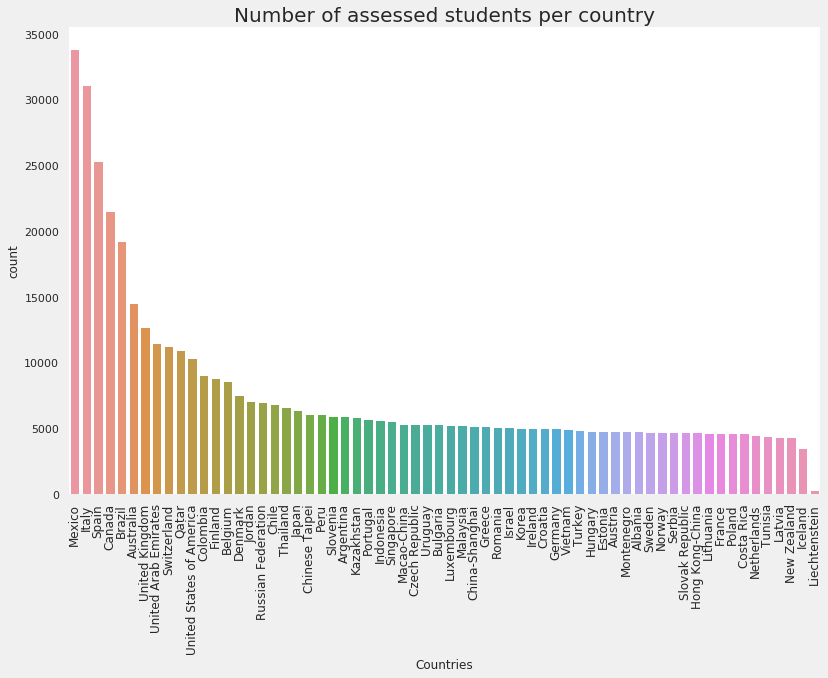

In [107]:
base_color = sns.color_palette()[4]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.set(style='white')
sns.countplot(data=df_clean, x = 'Country',order=df_clean['Country'].value_counts().index);
sns.despine(bottom = True, left = True)
plt.xlabel('Countries')
plt.xticks( rotation=90, fontsize='12')
plt.ylabel('count')
plt.title('Number of assessed students per country', fontsize=20)
plt.show()

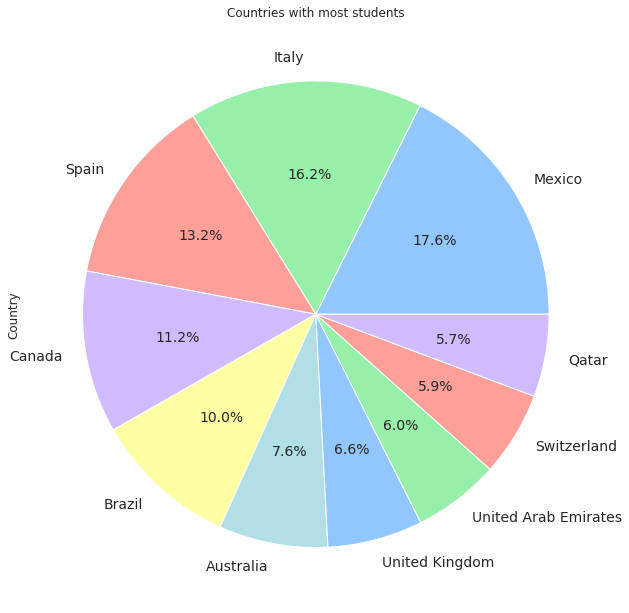

In [7]:
plt.style.use('seaborn-pastel')

p = df_clean.Country.value_counts().head(10).plot.pie(x='Country', autopct='%1.1f%%', rot=2,figsize=(15,10), fontsize = 14);
p.set_title("Countries with most students");

## What's the percentage of females/males in the dataset?
* In this visualisation, we examine the percentage of the overall gender distribution.
* It turns out that there are slightly more women than men with a percentage of 1% difference.

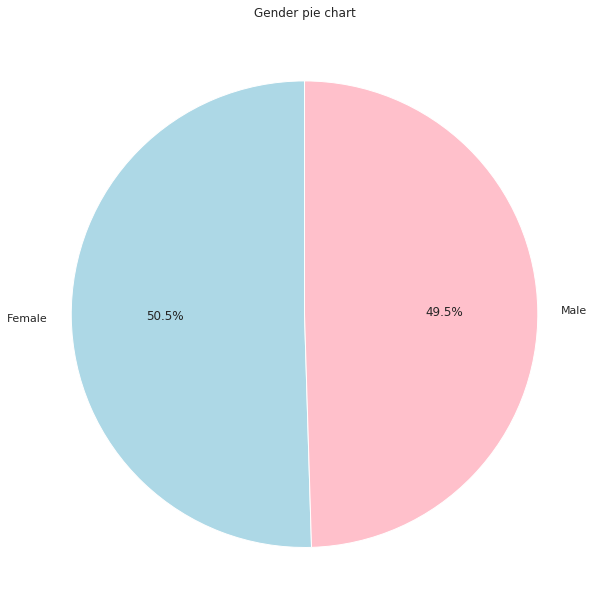

In [108]:
colors = ['lightblue', 'pink']
p = df_clean.Gender.value_counts().head(10).plot.pie(x='Gender', autopct='%1.1f%%', startangle=90, 
                                                     colors = colors, rot=2, figsize=(14,10));
p.set_title("Gender pie chart");
plt.ylabel(None);

We calculated the difference of males vs females in all countries and we ploted the results in a countplot.
<br>We can see that there are countries with more female than male and a few one with more male than female.
<br> We can see that in Mexico there more female than male and this is obvious from the countplot that we created.
<br> We can also observe that Italy have more male assessed students than female.

## Which countries have tha best performance for the 3 subjects?
It is interesting to see the countries with the highest performance in all subjects.

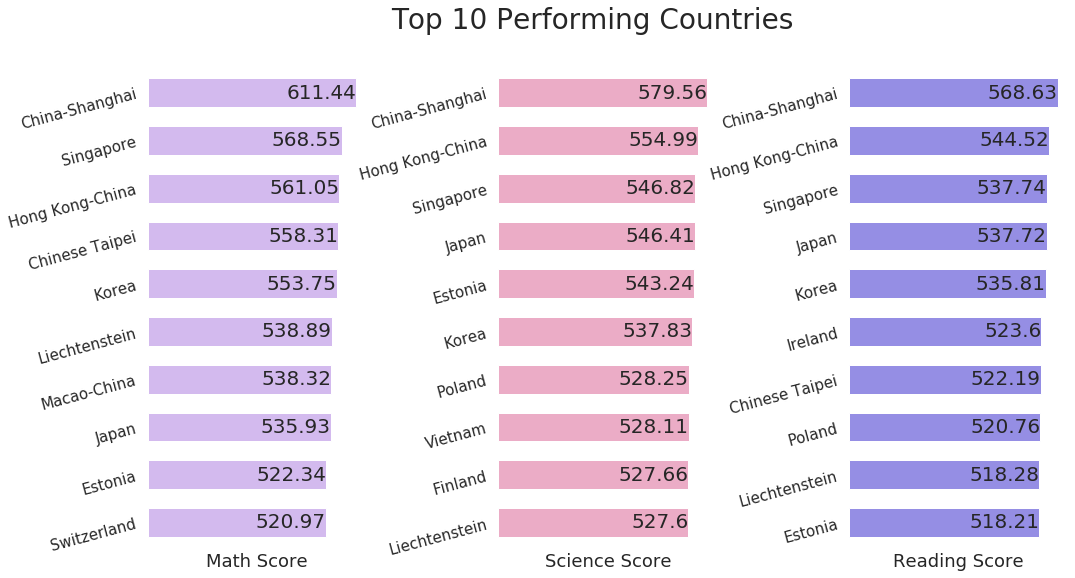

In [109]:
#create average score in each subject by country
top_math=df_clean.groupby('Country')['math_score'].mean().nlargest(10)
top_science=df_clean.groupby('Country')['science_score'].mean().nlargest(10)
top_reading=df_clean.groupby('Country')['reading_score'].mean().nlargest(10)

fig, ax = plt.subplots(figsize = [14.70, 8.27])
plt.subplots_adjust(wspace = 0.6)

#math
plt.subplot(1, 3, 1)
top_math.plot( y='country', kind = 'barh', color = '#d3baee' , width = 0.6)
plt.gca().invert_yaxis()
sns.despine(bottom = True, left = True)
plt.xlabel('Math Score'.title(), fontsize=18)
plt.ylabel(None)
plt.xticks(None)
plt.xticks([])
plt.yticks(fontsize=15, rotation=15)

for index, value in enumerate(top_math):
    plt.text( value, index, str(round(value, 2)), va = 'center', ha='right', fontsize=20)
    
#science
plt.subplot(1, 3, 2)
top_science.plot( y='country', kind = 'barh', color='#ebacc6', width = 0.6)
plt.gca().invert_yaxis()
sns.despine(bottom = True, left = True)
plt.xlabel('Science Score'.title(), fontsize=18)
plt.ylabel(None)
plt.xticks([])
plt.yticks(fontsize=15, rotation=15)
for index, value in enumerate(top_science):
    plt.text( value, index, str(round(value, 2)), va = 'center', ha='right',fontsize=20)
    
#reading 
plt.subplot(1, 3, 3)
top_reading.plot( y='country', kind = 'barh', color='#958ee4', width = 0.6)
plt.gca().invert_yaxis()
sns.despine(bottom = True, left = True)
plt.xlabel('Reading Score'.title(), fontsize=18)
plt.ylabel(None)
plt.xticks([])
plt.yticks(fontsize=15, rotation=15)
for index, value in enumerate(top_reading):
    plt.text( value, index, str(round(value, 2)), va = 'center', ha='right',fontsize=20)
    
# set the overall title
plt.suptitle('Top 10 performing countries'.title(), fontsize=28)
plt.show()

As we can see the top performance countries are the Asian countries. 
<br> This is something I would expect to be honest.
<br> It is interesting to see it plotted as well.
<br> We can see that Estonia has a really good performance in Science (5th place). Estonia is in top 10 on the 3 subjects. Place 9 on math, place 10 on Reading Score.
<br> Shanghai is the best on all subjects.
<br> The top 3 on all subject is Shanghai-Hong Kong-Singapore. All those countries are Asian countries. 

## What's the correlation matrix of Greece?
### Which variables have the strongest relationship?
As Greece is my country I would like to do more eploration of the greek data.
<br>I will plot a heatmap to find any correlations between the variables.
<br>I am really curious to see the relationships between different variables for Greece.

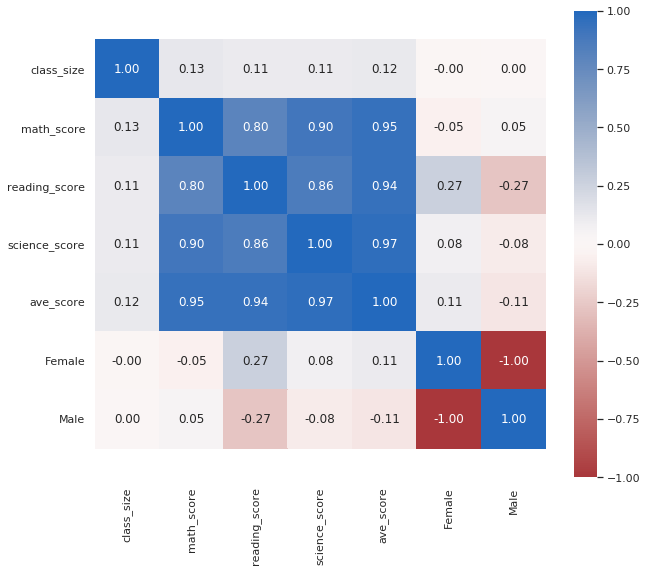

In [112]:
df_greece=df_clean.loc[df_clean["Country"] == "Greece",]
#make correlation matrix
corrMatrix_gr = df_greece.corr()

#plot heatmap of features correlated
plt.figure(figsize = [9,8])

ht = sns.heatmap(corrMatrix_gr, annot = True,cmap = 'vlag_r',fmt = '.2f',center = 0)
ht.set_ylim(len(corrMatrix_gr)+0.5, -0.5);

From this correlation matrix we can see that the scores of the students are very correlated to each other.
<br>For example math_score has a correlation of 0.968 with ave_score. 
<br>That means that students with high math scores propably have a good average score as well.
<br>We observe also a correlation of 0.960 for reading_score and average score.

## Are Greek students late for school? Is this based on gender?

<br>As a Greek, I always remember students be late for school.
<br>It is very interesting to explore if this is someting that is true in our dataset.
<br> I would like to explore if females or males in Greece tend to be late more often.
<br>We plot the violin plot with the Greece data and we observe a big difference for the males who are late 5 or more times.

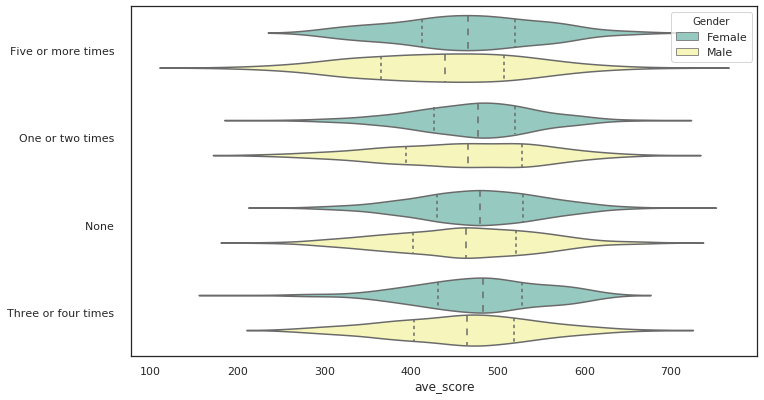

In [110]:
plt.figure(figsize=(10,6))
sns.violinplot(y='late_for_sch', x='ave_score', data = df_gr, inner = 'quartile', palette='Set3', hue='Gender', height=8, aspect=.7);
plt.ylabel(None);